Unsupervised Learning: Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# making blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,centers=5,n_features=2,random_state=0)
print(X.shape)

(1000, 2)


In [3]:
y[:100]

array([3, 2, 1, 1, 0, 0, 4, 0, 0, 1, 4, 3, 1, 0, 0, 0, 4, 1, 0, 0, 4, 4,
       2, 1, 2, 3, 2, 3, 4, 4, 0, 4, 4, 1, 4, 4, 1, 3, 4, 4, 1, 2, 3, 1,
       0, 2, 0, 2, 0, 3, 1, 0, 3, 0, 0, 4, 0, 4, 0, 1, 0, 4, 4, 0, 0, 3,
       3, 1, 2, 4, 2, 0, 4, 2, 1, 4, 4, 1, 1, 1, 3, 2, 4, 2, 1, 0, 3, 4,
       4, 0, 0, 2, 3, 1, 0, 0, 3, 2, 2, 2])

In [4]:
X

array([[-0.70564499,  8.55139891],
       [-0.99796039,  3.16403005],
       [ 2.82667347,  1.92710249],
       ...,
       [-1.01966506,  2.80165256],
       [-1.79775432,  6.73688929],
       [10.48310534, -3.73727439]])

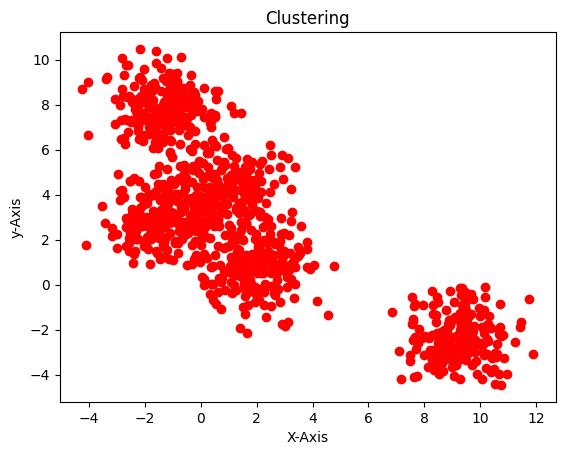

In [5]:
plt.scatter(X[:,0],X[:,1],color='red')
plt.xlabel('X-Axis')
plt.ylabel('y-Axis')
plt.title('Clustering')
plt.show()

In [6]:
# elbow method to find number of clusters
wccs = []
for i in range(1,11):
  cluster = KMeans(n_clusters=i,init='k-means++',random_state=42)
  cluster.fit(X)
  wccs.append(cluster.inertia_)

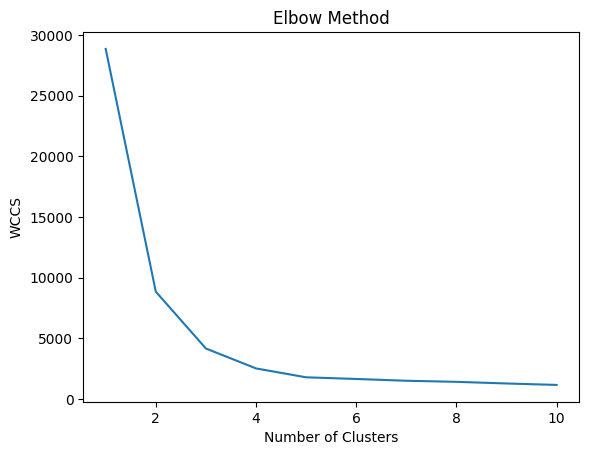

In [7]:
plt.plot(range(1,11),wccs)
plt.xlabel('Number of Clusters')
plt.ylabel('WCCS')
plt.title('Elbow Method')
plt.show()

In [8]:
cluster = KMeans(n_clusters=3)
cluster.fit(X)

KMeans(n_clusters=3)

In [9]:
y_pred = cluster.predict(X)
y_pred[:100]

array([2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1,
       0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1,
       1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0], dtype=int32)

[[ 0.54500527  2.46454313]
 [ 9.22241405 -2.33906048]
 [-1.15774815  7.46848414]]


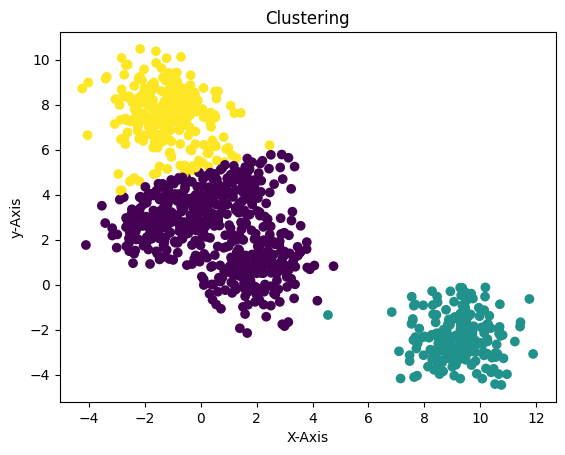

In [10]:
print(cluster.cluster_centers_)
plt.scatter(X[:,0],X[:,1],c=cluster.labels_,cmap='viridis',marker='o')
plt.xlabel('X-Axis')
plt.ylabel('y-Axis')
plt.title('Clustering')
plt.show()

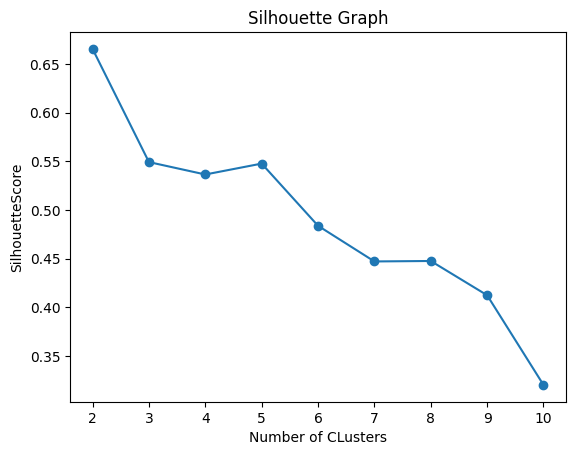

In [11]:
# Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = []
for i in range(2,11):
  cluster = KMeans(n_clusters=i,init='k-means++',random_state=42)
  y = cluster.fit_predict(X)
  silhouettescore = silhouette_score(X,y)
  silhouette_avg.append(silhouettescore)
plt.plot(range(2,11),silhouette_avg,marker='o')
plt.xlabel('Number of CLusters')
plt.ylabel('SilhouetteScore')
plt.title('Silhouette Graph')
plt.show()

In [12]:
cluster = KMeans(n_clusters=5)
cluster.fit(X)

KMeans(n_clusters=5)

[[ 0.95031109  4.32360957]
 [ 9.24576378 -2.34401749]
 [-1.41350987  2.88804152]
 [ 1.99215841  0.74817349]
 [-1.31500217  7.89129694]]


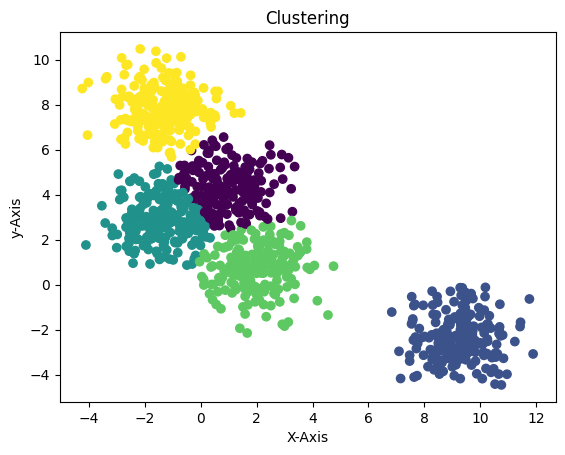

In [13]:
print(cluster.cluster_centers_)
plt.scatter(X[:,0],X[:,1],c=cluster.labels_,cmap='viridis',marker='o')
plt.xlabel('X-Axis')
plt.ylabel('y-Axis')
plt.title('Clustering')
plt.show()

In [14]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000,noise=0.05)
dbscan = DBSCAN(eps=0.20,min_samples=5)
labels = dbscan.fit_predict(X)

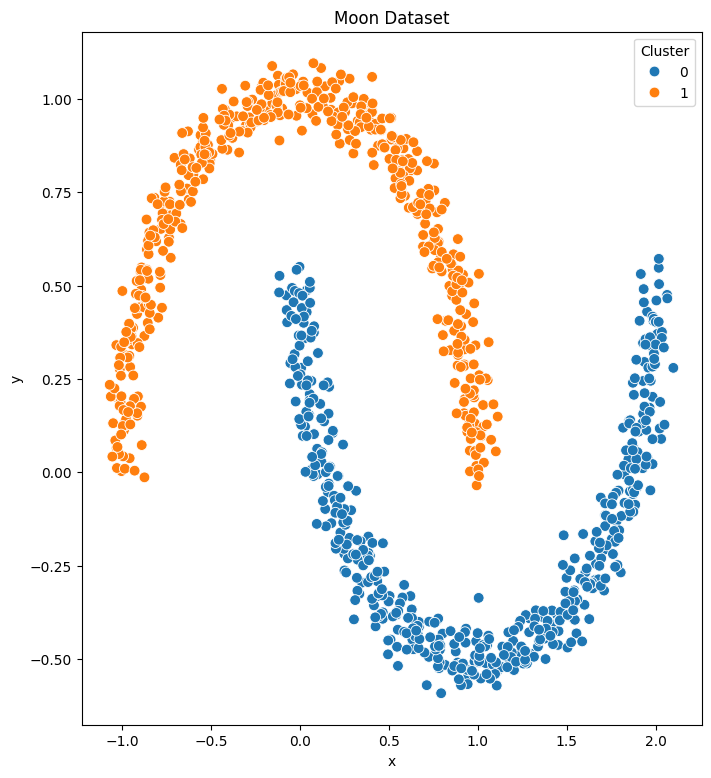

In [15]:
df = pd.DataFrame(X,columns=['x','y'])
df['cluster'] = labels.astype(str)
plt.figure(figsize=(8,9))
sns.scatterplot(data=df,x='x',y='y',hue='cluster',palette='tab10',s=60)
plt.title('Moon Dataset')
plt.legend(title='Cluster')
plt.show()

In [16]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3,n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [17]:
gm.weights_

array([0.19619996, 0.61168625, 0.19211379])

In [18]:
gm.means_

array([[ 1.76373825, -0.04500754],
       [ 0.49437258,  0.25757054],
       [-0.77604922,  0.54939292]])

In [19]:
gm.covariances_

array([[[ 0.0448629 ,  0.05458786],
        [ 0.05458786,  0.08255197]],

       [[ 0.18474773, -0.11977443],
        [-0.11977443,  0.29959777]],

       [[ 0.04169079,  0.05279754],
        [ 0.05279754,  0.08226149]]])